In [1]:
# import packages
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Dataset
from tensorflow.keras.datasets import mnist

In [3]:
# Split data into train and test
# xtrain, xtest - > images
# ytrain, ytest - > label
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11501568/11490434 [==============================] - 1s 0us/step


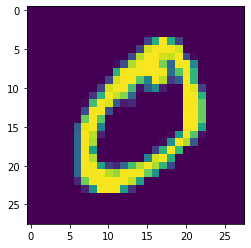

In [5]:
single_image = x_train[1]
plt.imshow(single_image)

In [6]:
# size of single image
single_image.shape

(28, 28)

In [7]:
# size of entire dataset
x_train.shape

(60000, 28, 28)

### Normalization

In [8]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
# one hot encoding for label
from tensorflow.keras.utils import to_categorical 

In [12]:
y_tr = to_categorical(y_train,10)

In [13]:
y_tr

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [14]:
y_te = to_categorical(y_test,10)

In [15]:
# target - [0,1,2,3,4,5,6,7,8,9]

In [16]:
# get max pixel value of image
single_image.max()

255

In [17]:
single_image.min()

0

In [18]:
# in max scalling
x_tr = x_train/255
x_te = x_test/255

In [19]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [20]:
x_tr[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

### Reshaping

In [21]:
x_tr.shape

(60000, 28, 28)

In [22]:
x_tr = x_tr.reshape(60000,28,28,1)

In [24]:
x_te.shape

(10000, 28, 28)

In [25]:
x_te = x_te.reshape(10000,28,28,1)

### Creating model

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D, Flatten

In [31]:
# creating model
model = Sequential()

# Convolutional layer
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
# Pooling layer
model.add(MaxPool2D(pool_size=(2,2)))
# Flatten layer
model.add(Flatten())
model.add(Dense(128,activation='relu'))
# Output layer
model.add(Dense(10,activation = 'softmax'))
# [0,1,2,3,4,5,6,7,8,9] - > 10 classes

In [32]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
________________________________________________

In [35]:
from tensorflow.keras.callbacks import EarlyStopping 

In [36]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [37]:
model.fit(x_tr,y_tr,epochs=10,validation_data=(x_te,y_te),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 46s 23ms/step - loss: 0.1400 - accuracy: 0.9584 - val_loss: 0.0494 - val_accuracy: 0.9847
Epoch 2/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0495 - accuracy: 0.9847 - val_loss: 0.0413 - val_accuracy: 0.9864
Epoch 3/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0302 - accuracy: 0.9907 - val_loss: 0.0505 - val_accuracy: 0.9830
Epoch 4/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0217 - accuracy: 0.9931 - val_loss: 0.0382 - val_accuracy: 0.9875
Epoch 5/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0142 - accuracy: 0.9954 - val_loss: 0.0419 - val_accuracy: 0.9880
Epoch 6/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0111 - accuracy: 0.9962 - val_loss: 0.0511 - val_accuracy: 0.9869


In [38]:
model_plot = pd.DataFrame(model.history.history)

<AxesSubplot:>

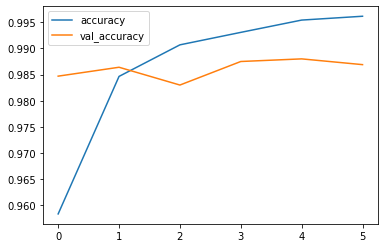

In [41]:
model_plot[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

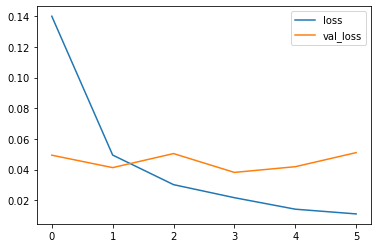

In [42]:
model_plot[['loss','val_loss']].plot()